In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [2]:
cal_df = pd.read_csv('data/calories.csv')
cal_df.sample(5)

,User_ID,Calories
7781,16384794,131.0
12142,11583518,127.0
12990,18146381,16.0
8484,14105244,61.0
13539,16892019,50.0


In [3]:
exer_df = pd.read_csv('data/exercise.csv')
exer_df.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7172,19786486,female,64,157.0,54.0,16.0,95.0,40.5
14254,19204964,male,28,174.0,81.0,14.0,95.0,40.1
278,13945114,female,60,152.0,50.0,7.0,89.0,39.8
794,17143275,female,71,165.0,67.0,19.0,91.0,40.3
11654,19999044,female,25,169.0,66.0,22.0,105.0,40.6


In [4]:
df = pd.merge(exer_df, cal_df, on='User_ID')
df.sample(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
13902,12863970,female,33,150.0,52.0,30.0,112.0,41.2,209.0
11815,11486500,male,28,185.0,82.0,27.0,99.0,40.9,132.0
10559,13603420,male,40,180.0,84.0,11.0,90.0,40.0,46.0
8830,13368237,female,35,152.0,51.0,18.0,96.0,40.6,95.0
6680,13742239,male,21,163.0,63.0,24.0,110.0,41.0,139.0


In [5]:
df = df.set_index('User_ID')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 14733363 to 11751526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


In [9]:
def DataAnalysis(df ,column) :
    cat_col = ['Gender']
    plt.figure(figsize=(16, 8))
    if column in cat_col :
        plt.subplot(1,2,1)
        plt.title(f"scatter plot for {column}")
        sns.scatterplot(x=df['Calories'], hue=df[column], s=100)
        plt.subplot(1,2,2)
        plt.title(f"Pie Plot for {column}")
        plt.pie(df[column].value_counts().values, labels=df[column].value_counts().index, autopct='%1.2f%%')
        plt.show()
    else :
        plt.subplot(1,2,1)
        plt.title(f"Histogram Plot for {column}")
        sns.histplot(x=df[column], hue=df['Gender'])
        plt.subplot(1,2,2)
        plt.title(f"Scatter Plot for {column}")
        sns.scatterplot(y=df['Calories'], x=df[column], hue=df['Gender'])
        plt.show()


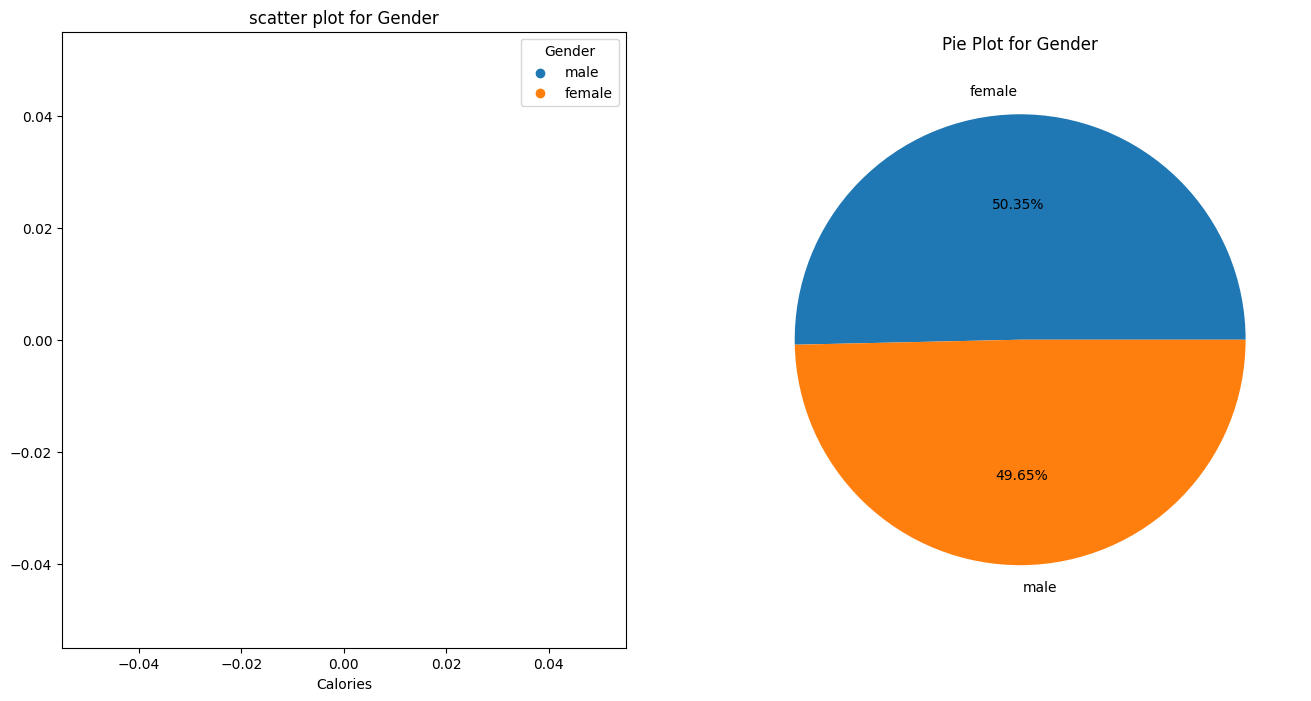

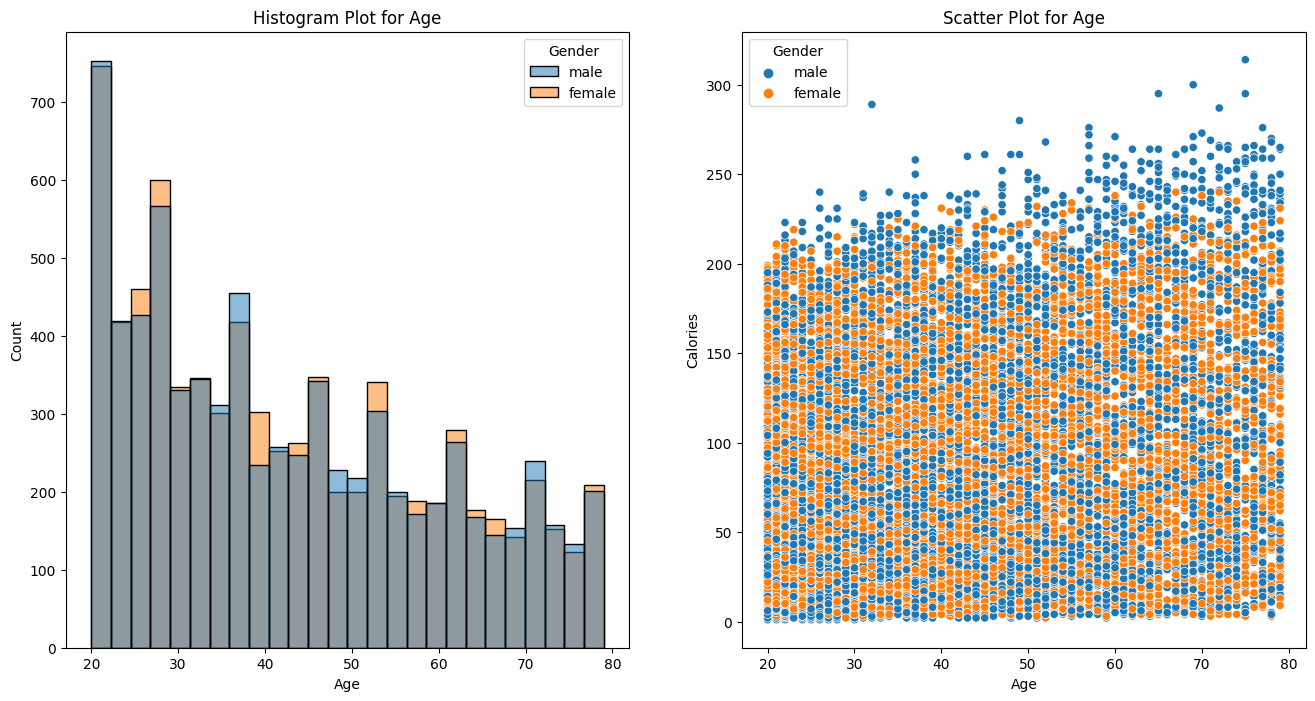

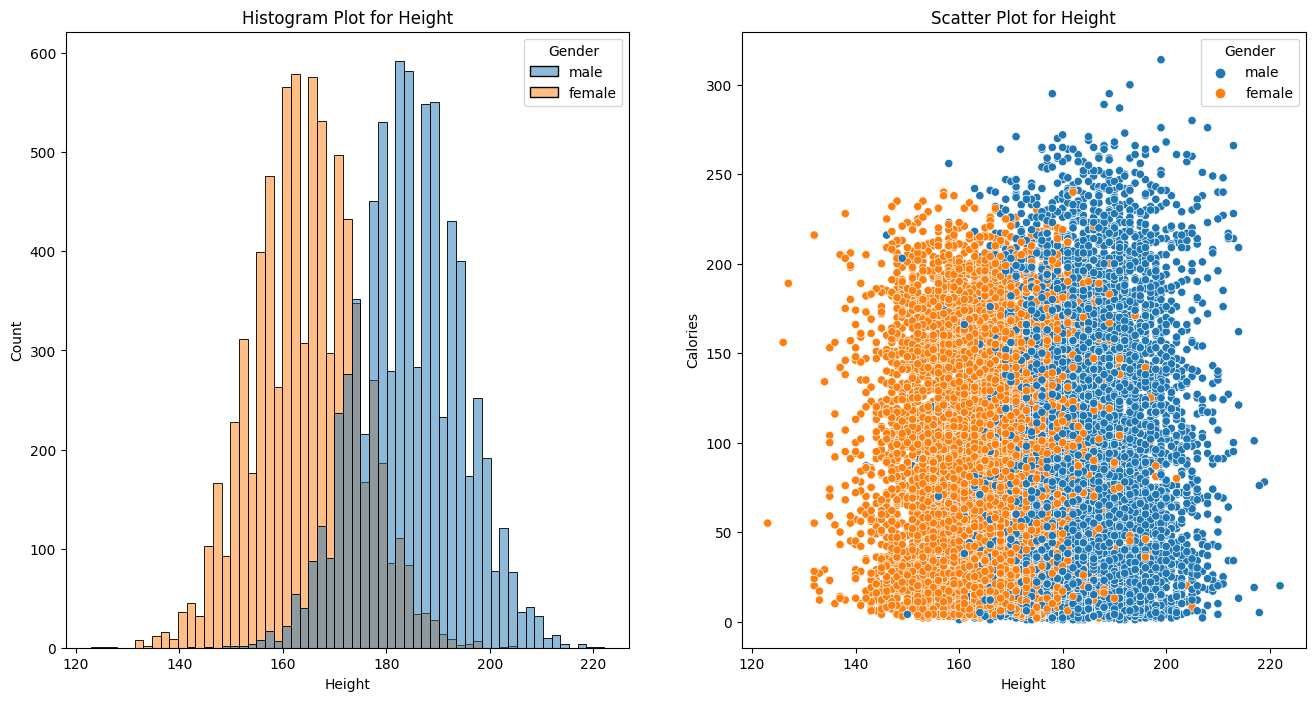

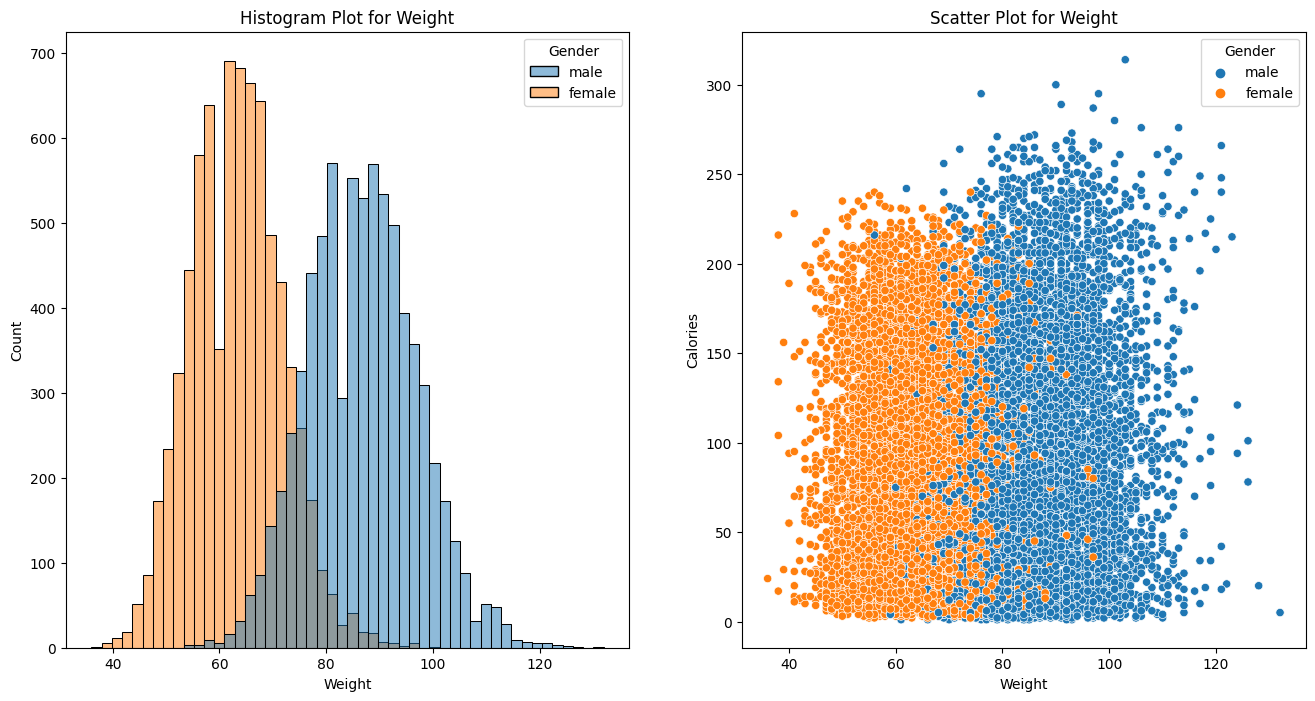

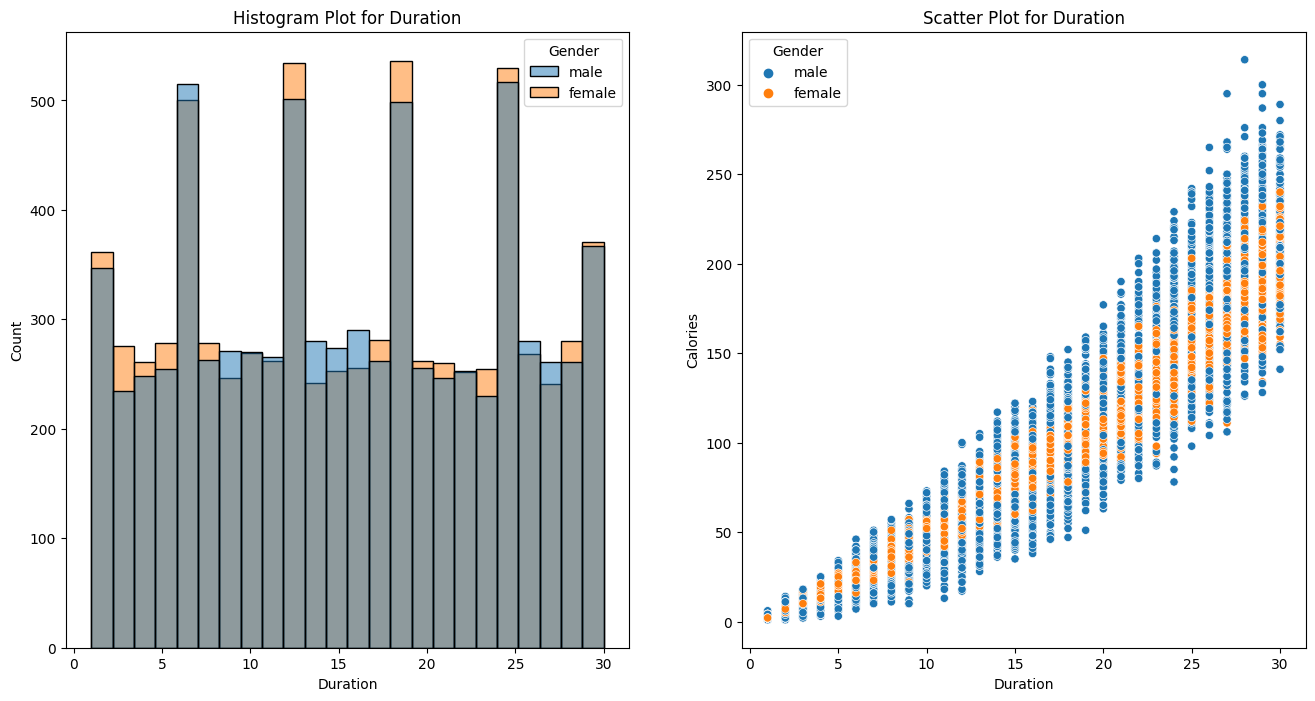

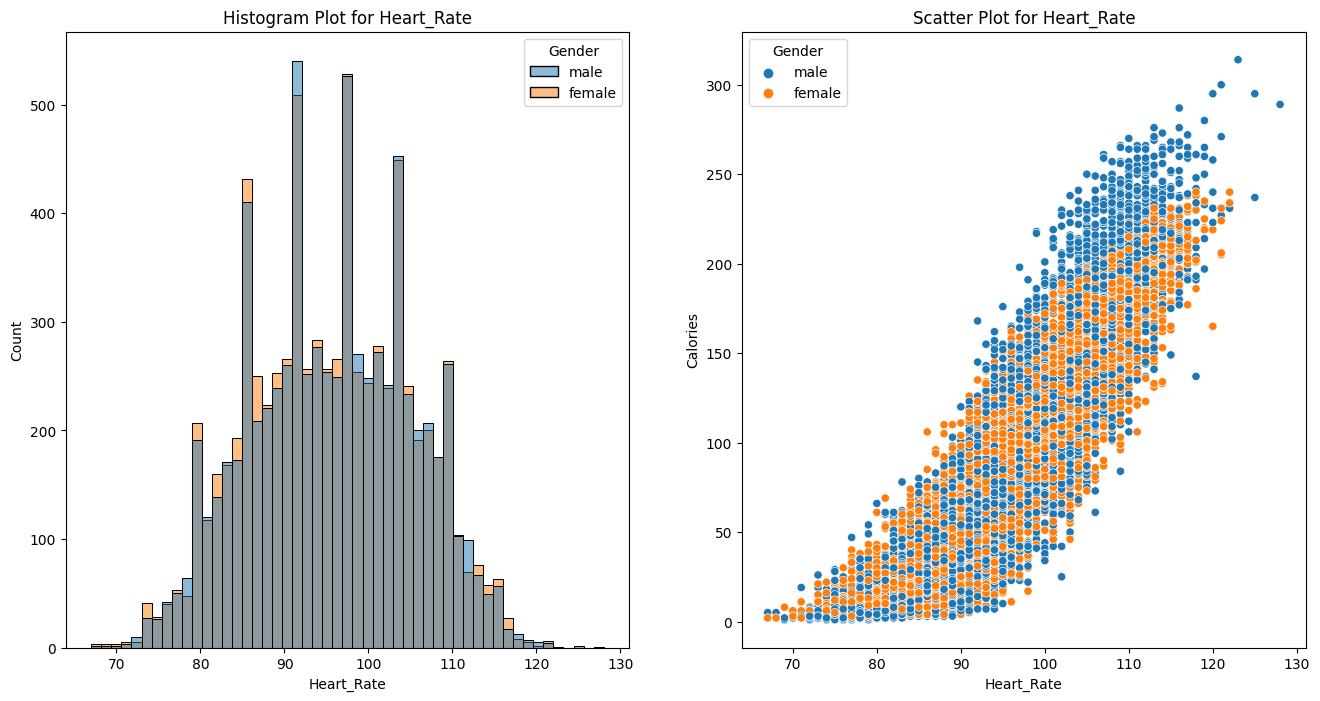

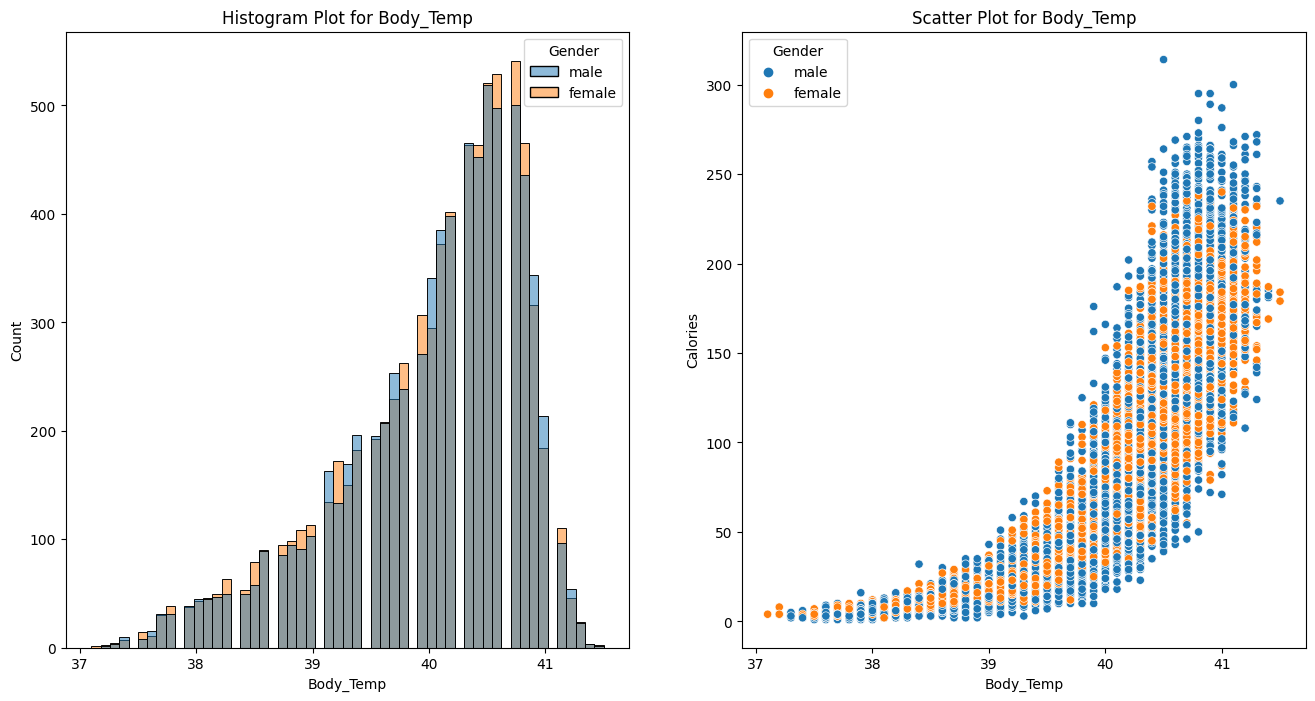

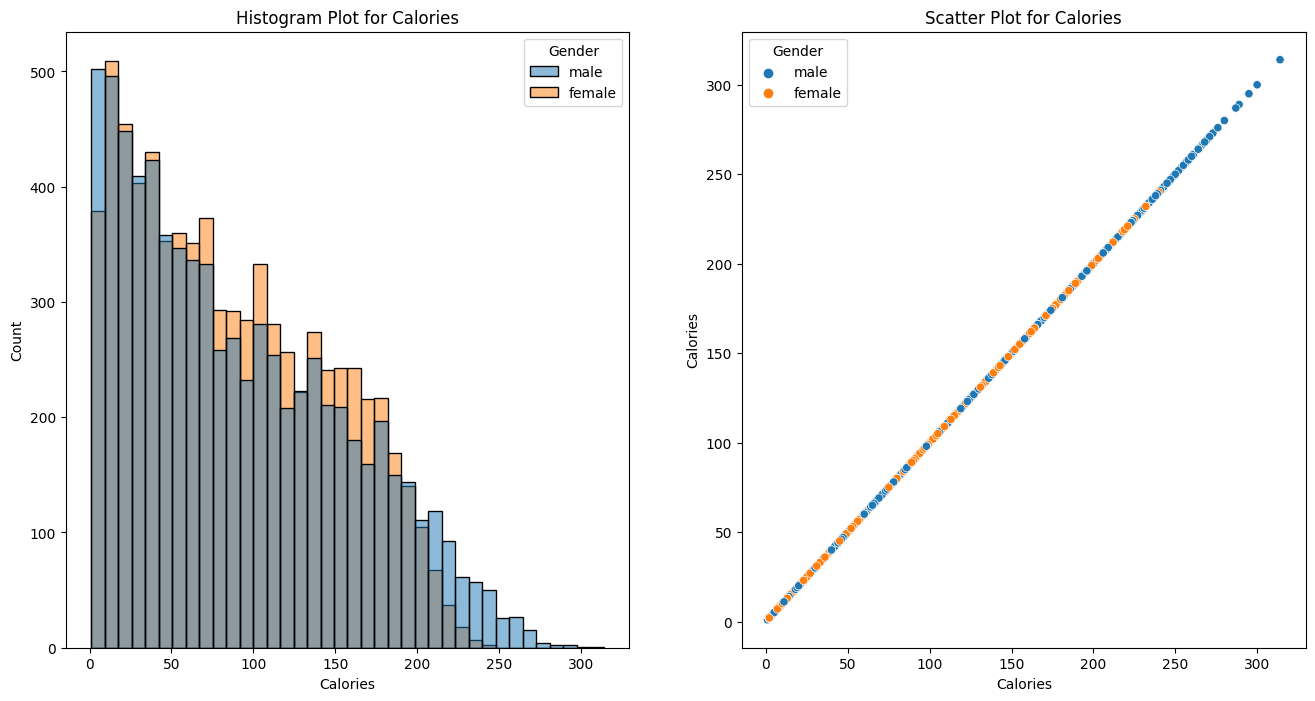

In [10]:
df_sample = df.sample(2000)
for column in df.columns:
    DataAnalysis(df, column)